<a href="https://colab.research.google.com/github/xiexukang/machine_learning/blob/master/cnn%E8%A7%A3%E5%86%B3%E9%AA%8C%E8%AF%81%E7%A0%81%E9%97%AE%E9%A2%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install captcha

In [0]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import string
characters = string.digits + string.ascii_uppercase
print(characters)
import os

width, height, n_len, n_class = 160, 60, 4, len(characters)
for i in range(1000):
  generator = ImageCaptcha(width=width, height=height)
  random_str = ''.join([random.choice(characters) for j in range(4)])
  img = generator.generate_image(random_str)
  #保存验证码

  file_name=random_str+'.jpg'
  img.save(os.path.join("./test",file_name))

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


In [0]:
import os
import matplotlib.pyplot as plt
#载入图片
import matplotlib.image as mpimg
#导出数组文件
import numpy as np
def dataprocess(img_path):
  import string
  characters = string.digits + string.ascii_uppercase
  
  
  pic_list = os.listdir(img_path)
  #print(pic_list)
  X = np.zeros((len(pic_list), 60, 160, 3), dtype=np.float32)
  number=len(pic_list)
  y = np.zeros((number, 4,36), dtype=np.uint8)
  for i in range(number):
    img = mpimg.imread(os.path.join(img_path,pic_list[i]))
    
    random_str = pic_list[i].split(".")[0]
    #print(random_str)
    X[i] = np.array(img)/255.0
    label = [np.zeros(36) for _ in range(4)]
    for j, ch in enumerate(random_str):
      
      label[j][characters.find(ch)] = 1
    
    if i ==0:
      print(label)
    y[i] =label
  
  # data=tf.data.Dataset.from_tensor_slices((X,y))
  return X,y


In [0]:
def decode(y):
  y = np.argmax(y,axis=1)
  return ''.join([characters[int(x)] for x in y])

In [0]:
import tensorflow as tf
X,y = dataprocess("./train")
y[1].shape

[array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])]


(4, 36)

Text(0.5, 1.0, '8ZK4')

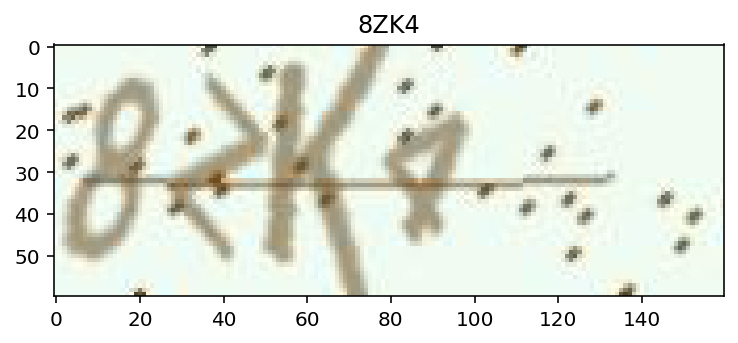

In [0]:


plt.imshow(X[1])
plt.title(decode(y[1]))

In [0]:
X = np.expand_dims(X,axis=1)
X.shape

(9977, 1, 60, 160, 3)

In [0]:

y.shape

(9977, 4, 36)

In [0]:
train_ds=tf.data.Dataset.from_tensor_slices((X,y))

ValueError: ignored

In [0]:
test_x,test_y = dataprocess("./test")

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])]


In [0]:
test_x = np.expand_dims(test_x,axis=1)

test_x.shape

(7981, 1, 60, 160, 3)

In [0]:

test_y.shape

(7981, 4, 36)

In [0]:

test_ds = tf.data.Dataset.from_tensor_slices((test_x,test_y))

In [0]:
train_ds

<TensorSliceDataset shapes: ((1, 60, 160, 3), (4, 36)), types: (tf.float32, tf.uint8)>

In [0]:
test_ds

<TensorSliceDataset shapes: ((1, 60, 160, 3), (4, 36)), types: (tf.float32, tf.uint8)>

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint
from tensorflow.keras.optimizers import *


In [0]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

input_tensor = Input((height, width, 3))
x = input_tensor
for i, n_cnn in enumerate([2, 2, 2, 2, 2]):
    for j in range(n_cnn):
        x = Conv2D(32*2**min(i, 3), kernel_size=3, padding='same', kernel_initializer='he_uniform')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(n_len)]
model = Model(inputs=input_tensor, outputs=x)

In [0]:
callbacks = [EarlyStopping(patience=3), CSVLogger('cnn.csv'), ModelCheckpoint('cnn_best.h5', save_best_only=True)]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(1e-3, amsgrad=True), 
              metrics=['accuracy'])
model.fit(train_ds,epochs=10,validation_data=test_ds,callbacks=callbacks,workers=4)

Epoch 1/10


ValueError: ignored

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

In [0]:
def decode(y):
  print(np.array(y).shape)
  print(characters)
  
  y = np.argmax(np.array(y), axis=1)
  print(str(y))
  return ''.join([characters[x] for x in y])

In [0]:
print(y[0])
print(decode(y[0]))

[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
(4, 36)
0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ
[ 2 14 10  3]
2EA3


(4, 36)
0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ
[ 2 14 10  3]


Text(0.5, 1.0, '2EA3')

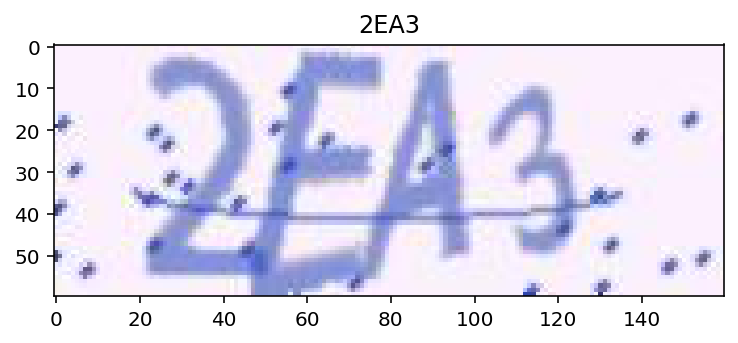

In [0]:
plt.imshow(X[0])
plt.title(decode(y[0]))

In [0]:
y.shape

(9977, 4, 36)

In [0]:
X.shape

(9977, 60, 160, 3)

In [0]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

input_tensor = Input((60, 160, 3))
x = input_tensor
for i, n_cnn in enumerate([2, 2, 2, 2, 2]):
    for j in range(n_cnn):
        x = Conv2D(32*2**min(i, 3), kernel_size=3, padding='same', kernel_initializer='he_uniform')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(n_len)]
model = Model(inputs=input_tensor, outputs=x)

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60, 160, 3)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 60, 160, 32)  896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 60, 160, 32)  128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 60, 160, 32)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint
from tensorflow.keras.optimizers import *

train_data = dataprocess('./train')
valid_data = dataprocess('./test')
callbacks = [EarlyStopping(patience=3), CSVLogger('cnn.csv'), ModelCheckpoint('cnn_best.h5', save_best_only=True)]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(1e-3, amsgrad=True), 
              metrics=['accuracy'])
model.fit_generator(train_data, epochs=100, validation_data=valid_data, workers=4, use_multiprocessing=True,
                    callbacks=callbacks)

Epoch 1/100


ValueError: ignored